In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

Project_Path = "C:\\Users\\Othmane Tazi\\Desktop\\PgProject"
raw_data_path = os.path.join(Project_Path, 'raw_coordinates.csv')

In [2]:
columns = {
    # Column Name   Column Index
    "frameID":      0,
    # wrist
    "wrist_x":      1,
    "wrist_y":      2,
    "wrist_z":      3,
    # thumb finger
    "thmb_base_x":  4,
    "thmb_base_y":  5,
    "thmb_base_z":  6,
    "thmb_joint_x": 7,
    "thmb_joint_y": 8,
    "thmb_joint_z": 9,
    "thmb_tip_x":   10,
    "thmb_tip_y":   11,
    "thmb_tip_z":   12,
    # index finger
    "indx_base_x":  13,
    "indx_base_y":  14,
    "indx_base_z":  15,
    "indx_joint_x": 16,
    "indx_joint_y": 17,
    "indx_joint_z": 18,
    "indx_tip_x":   19,
    "indx_tip_y":   20,
    "indx_tip_z":   21,
    # middle finder
    "midl_base_x":  22,
    "midl_base_y":  23,
    "midl_base_z":  24,
    "midl_joint_x": 25,
    "midl_joint_y": 26,
    "midl_joint_z": 27,
    "midl_tip_x":   28,
    "midl_tip_y":   29,
    "midl_tip_z":   30,
    # ring finger
    "ring_base_x":  31,
    "ring_base_y":  32,
    "ring_base_z":  33,
    "ring_joint_x": 34,
    "ring_joint_y": 35,
    "ring_joint_z": 36,
    "ring_tip_x":   37,
    "ring_tip_y":   38,
    "ring_tip_z":   39,
    # pinky
    "pink_base_x":  40,
    "pink_base_y":  41,
    "pink_base_z":  42,
    "pink_joint_x": 43,
    "pink_joint_y": 44,
    "pink_joint_z": 45,
    "pink_tip_x":   46,
    "pink_tip_y":   47,
    "pink_tip_z":   48,
}

# columns seperated by axis
x_columns = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46]
y_columns = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47]
z_columns = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]

In [3]:
# Loadint the data into the notebook
# Create an empty list to store the data
data = []

# Open the CSV file in read mode
with open(raw_data_path, mode='r') as file:
    # Create a csv.reader object
    reader = csv.reader(file)

    # Read the data from the CSV file row by row
    for row in reader:
         if row and len(row) == 49:
            data.append(row)

data = np.array(data).astype(int)
data.shape

(4916, 49)

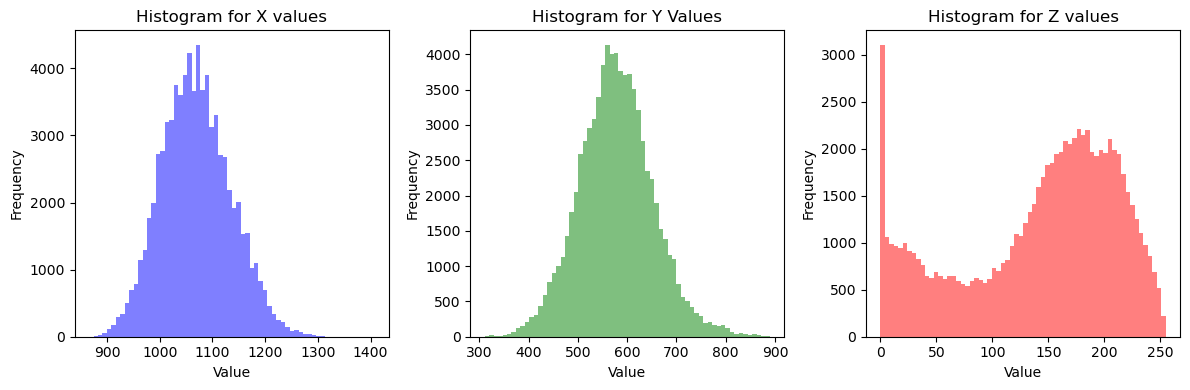

In [4]:
# combining all x values into one list
combined_x = []

for idx in x_columns:
    combined_x.extend(data[:, idx])
    
# combining all y values into one list
combined_y = []

for idx in y_columns:
    combined_y.extend(data[:, idx])
    
# combining all z values into one list
combined_z = []

for idx in z_columns:
    combined_z.extend(data[:, idx])
    
# Create separate charts for each list
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Create histograms for each list and add them to the respective chart
axs[0].hist(combined_x, bins=64, alpha=0.5, color='blue')
axs[0].set_title('Histogram for X values')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(combined_y, bins=64, alpha=0.5, color='green')
axs[1].set_title('Histogram for Y Values')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(combined_z, bins=64, alpha=0.5, color='red')
axs[2].set_title('Histogram for Z values')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the charts
plt.show()
    

In [5]:
# getting min and max of each axis
arr_x = np.array(combined_x)
arr_y = np.array(combined_y)
arr_z = np.array(combined_z)


print("x-min: ", np.min(arr_x), ", x-max: ", np.max(arr_x), ", mean: ", np.mean(arr_x))
print("y-min: ", np.min(arr_y), ", y-max: ", np.max(arr_y), ", mean: ", np.mean(arr_y))
print("z-min: ", np.min(arr_z), ", z-max: ", np.max(arr_z), ", mean: ", np.mean(arr_z))

x-min:  866 , x-max:  1407 , mean:  1069.217669344996
y-min:  311 , y-max:  890 , mean:  577.9740769934906
z-min:  0 , z-max:  255 , mean:  141.32657394222946


In [6]:
#identifying the rows that might not have been properly aligned
bad_rows_255 = []
thresh = 7

for i, row in enumerate(data):
    count = 0
    for idx in z_columns:
        if row[idx] == 255:
            bad_rows_255.append(i)
            break
        if row[idx] >= 205:
            count += 1
    if count >= thresh:
        bad_rows_255.append(i)
            
bad_rows_0 = []

for i, row in enumerate(data):
    count = 0
    for idx in z_columns:
        if row[idx] == 0:
            bad_rows_0.append(i)
            break
        if row[idx] <= 50:
            count += 1
    if count >= thresh:
        bad_rows_0.append(i)
            

bad_rows = set(bad_rows_255 + bad_rows_0)

len(bad_rows)

2435

In [7]:
# removing misaligned entries
mask = np.ones(data.shape[0], dtype=bool)
mask[list(bad_rows)] = False

trimmed_data = data[mask]
trimmed_data.shape

(2481, 49)

250 1 98.98065296251511 61.500671183022
1475


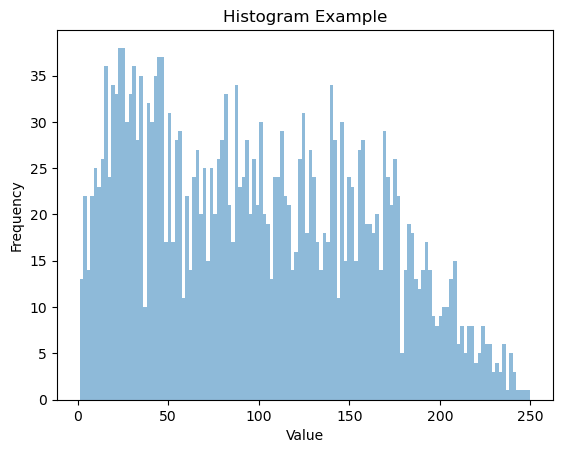

In [8]:
# identifying misaligned entries based on the distance between the minimum and maximum z values per entry
z_dists = []
for row in trimmed_data:
    min = 255
    max = 0
    for col in z_columns:
        val = row[col]
        if(val < min):
            min = val
        if(val > min):
            max = val
    z_dists.append(max - min)
    
z_dists = np.array(z_dists)

print(np.max(z_dists), np.min(z_dists), np.mean(z_dists), np.std(z_dists))

mean_z_dists = np.mean(z_dists)
std_z_dists = np.std(z_dists)

# Filter elements within one standard deviation of the mean
std_fit_frames = [x for x in z_dists if mean_z_dists - std_z_dists < x < mean_z_dists + std_z_dists]
print(len(std_fit_frames))


plt.hist(z_dists, bins=128, alpha=0.5)
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
# removing misaligned entries based on the distance between the minimum and maximum z values per entry
clean_idxs = [i for i, x in enumerate(z_dists) if mean_z_dists - std_z_dists < x < mean_z_dists + std_z_dists]

cleaned_data = trimmed_data[clean_idxs]
cleaned_data.shape

(1475, 49)

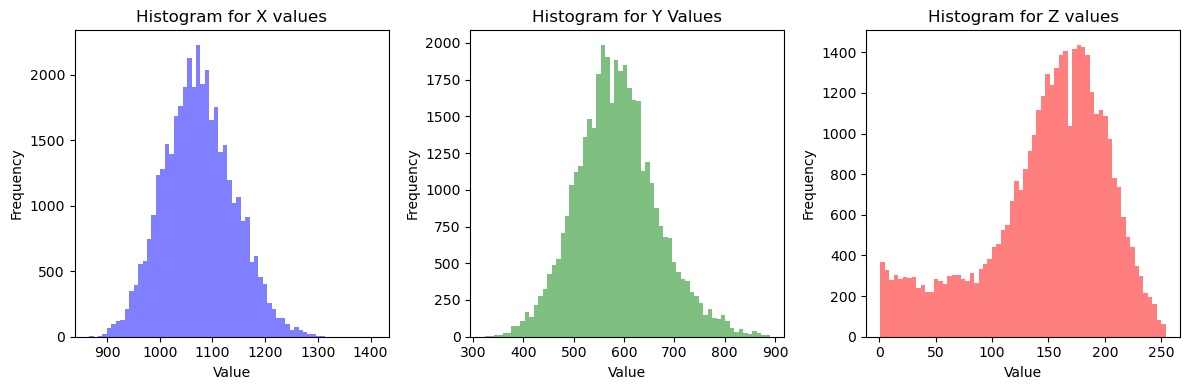

In [10]:
# combining all x values into one list
combined_x2 = []

for idx in x_columns:
    combined_x2.extend(trimmed_data[:, idx])
    
# combining all y values into one list
combined_y2 = []

for idx in y_columns:
    combined_y2.extend(trimmed_data[:, idx])
    
# combining all z values into one list
combined_z2 = []

for idx in z_columns:
    combined_z2.extend(trimmed_data[:, idx])
    
# Create separate charts for each list
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Create histograms for each list and add them to the respective chart
axs[0].hist(combined_x2, bins=64, alpha=0.5, color='blue')
axs[0].set_title('Histogram for X values')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(combined_y2, bins=64, alpha=0.5, color='green')
axs[1].set_title('Histogram for Y Values')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(combined_z2, bins=64, alpha=0.5, color='red')
axs[2].set_title('Histogram for Z values')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the charts
plt.show()

In [11]:
#getting min and max of each axis on the cleaned data
arr_x = np.array(combined_x2)
arr_y = np.array(combined_y2)
arr_z = np.array(combined_z2)

x_min = np.min(arr_x)
x_max = np.max(arr_x)

y_min = np.min(arr_y)
y_max = np.max(arr_y)

z_min = np.min(arr_z)
z_max = np.max(arr_z)


print("x-min: ", np.min(arr_x), ", x-max: ", np.max(arr_x), ", mean: ", np.mean(arr_x))
print("y-min: ", np.min(arr_y), ", y-max: ", np.max(arr_y), ", mean: ", np.mean(arr_y))
print("z-min: ", np.min(arr_z), ", z-max: ", np.max(arr_z), ", mean: ", np.mean(arr_z))

x-min:  866 , x-max:  1407 , mean:  1074.412459693672
y-min:  323 , y-max:  890 , mean:  585.8193016928658
z-min:  1 , z-max:  254 , mean:  146.86195082627972


In [157]:
# normalize the data
normalized_data = np.empty_like(cleaned_data).astype(float)
print(normalized_data.shape)

normalized_data[:, 0] = cleaned_data[:, 0].astype(float)

x_range = x_max - x_min
for col in x_columns:
    norm_col = 2 * (cleaned_data[:, col] - x_min) / x_range - 1
    normalized_data[:, col] = norm_col
    
y_range = y_max - y_min
for col in y_columns:
    norm_col = 2 * (cleaned_data[:, col] - y_min) / y_range - 1
    normalized_data[:, col] = norm_col
    
z_range = z_max - z_min
for col in z_columns:
    norm_col = 2 * (cleaned_data[:, col] - z_min) / z_range - 1
    normalized_data[:, col] = norm_col

    

(1475, 49)


In [158]:
# get coordinates to crop the images when apply the marker elicitation technique
shapes_mat = np.empty((1475, 5))

shapes_mat[:, 0] = cleaned_data[:, 0]

x_maxs = []
x_mins = []

y_maxs = []
y_mins = []

for row in cleaned_data:
    smax_x = 0
    smin_x = 1920
    
    for idx in x_columns:
        if row[idx] > smax_x:
            smax_x = row[idx]
        if row[idx] < smin_x:
            smin_x = row[idx]
            
    x_maxs.append(smax_x)
    x_mins.append(smin_x)
            
    smax_y = 0
    smin_y = 1080
    
    for idx in y_columns:
        if row[idx] > smax_y:
            smax_y = row[idx]
        if row[idx] < smin_y:
            smin_y = row[idx]
        
    y_maxs.append(smax_y)
    y_mins.append(smin_y)

    
shapes_mat[:, 1] = np.array(x_maxs)
shapes_mat[:, 2] = np.array(x_mins)
shapes_mat[:, 3] = np.array(y_maxs)
shapes_mat[:, 4] = np.array(y_mins)



In [159]:
# save the crop coordinates
crop_path = os.path.join(Project_Path, 'crop_coordinates.csv')
np.savetxt(crop_path, shapes_mat, delimiter=',', fmt='%d') 

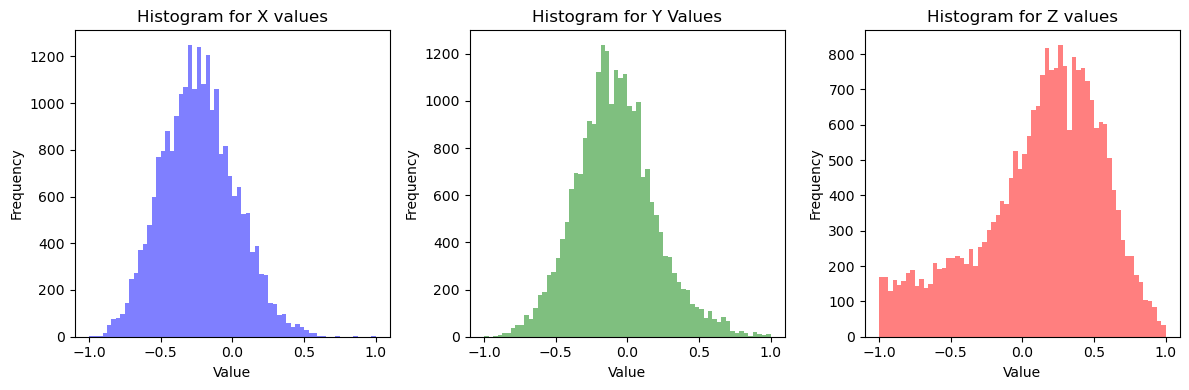

In [160]:
# combining all x values into one list
combined_x3 = []

for idx in x_columns:
    combined_x3.extend(normalized_data[:, idx])
    
# combining all y values into one list
combined_y3 = []

for idx in y_columns:
    combined_y3.extend(normalized_data[:, idx])
    
# combining all z values into one list
combined_z3 = []

for idx in z_columns:
    combined_z3.extend(normalized_data[:, idx])
    
# Create separate charts for each list
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Create histograms for each list and add them to the respective chart
axs[0].hist(combined_x3, bins=64, alpha=0.5, color='blue')
axs[0].set_title('Histogram for X values')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(combined_y3, bins=64, alpha=0.5, color='green')
axs[1].set_title('Histogram for Y Values')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(combined_z3, bins=64, alpha=0.5, color='red')
axs[2].set_title('Histogram for Z values')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the charts
plt.show()

In [161]:
#save cleaned data
clean_data_path = os.path.join(Project_Path, 'cleaned_coordinates.csv')
np.savetxt(clean_data_path, normalized_data, delimiter=',', fmt='%.5f') 

In [162]:
# shuffle the rows
np.random.shuffle(normalized_data)

# Define the split ratio (80:20)
split_ratio = 0.8

# Calculate the split index
split_index = int(split_ratio * len(normalized_data))

# Split the data into training and testing sets
train_data = normalized_data[:split_index]
test_data = normalized_data[split_index:]


train_data_path = os.path.join(Project_Path, 'train_data.csv')
np.savetxt(train_data_path, train_data, delimiter=',', fmt='%.5f') 

test_data_path = os.path.join(Project_Path, 'test_data.csv')
np.savetxt(test_data_path, test_data, delimiter=',', fmt='%.5f') 